In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.svm import SVC

In [2]:
# Import test.csv and train.csv files as test and train datasets respectively
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

# Titanic Dataset Data Dictionary

## Variables

- **survival**: Survival
  - 0 = No, 1 = Yes
- **pclass**: Ticket class
  - 1 = 1st, 2 = 2nd, 3 = 3rd
- **sex**: Sex
- **age**: Age in years
  - Fractional if less than 1; estimated as xx.5
- **sibsp**: Number of siblings/spouses aboard the Titanic
- **parch**: Number of parents/children aboard the Titanic
- **ticket**: Ticket number
- **fare**: Passenger fare
- **cabin**: Cabin number
- **embarked**: Port of Embarkation
  - C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- **age**: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5
- **sibsp**: The dataset defines family relations as:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
- **parch**: The dataset defines family relations as:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.

# Data Exploration

In [3]:
train_data.head(20)  # Display the first few rows of the training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data.head(20)   # Display the first few rows of the test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
# Give summary statistics of the training and test
train_data.describe()  # Summary statistics of the training dataset


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()   # Summary statistics of the test dataset

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Identify the columns with missing values in the training dataset
missing_train = train_data.isnull().sum()
missing_train = missing_train[missing_train > 0]
print("Missing values in training dataset:\n", missing_train)

Missing values in training dataset:
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [8]:
# Repeat for the test dataset
missing_test = test_data.isnull().sum()
missing_test = missing_test[missing_test > 0]
print("Missing values in training dataset:\n", missing_test)

Missing values in training dataset:
 Age       86
Fare       1
Cabin    327
dtype: int64


In [9]:
# Get the size of each dataset as well
print("Training dataset size:", train_data.shape)
print("Test dataset size:", test_data.shape)

Training dataset size: (891, 12)
Test dataset size: (418, 11)


# Basic Plotting

In [10]:

# Survival rate with respect to certain columns that I want to investigate
columns_of_interest=['Pclass','Sex','SibSp']

def plot_survival_rate_by_column(columns,data_set):
    for column in columns:
        sns.barplot(x=column, y='Survived', data=data_set)
        plt.title(f'Survival Rate by {column}')
        plt.xlabel(column.capitalize())
        plt.ylabel('Survival Rate')
        plt.show()
    return


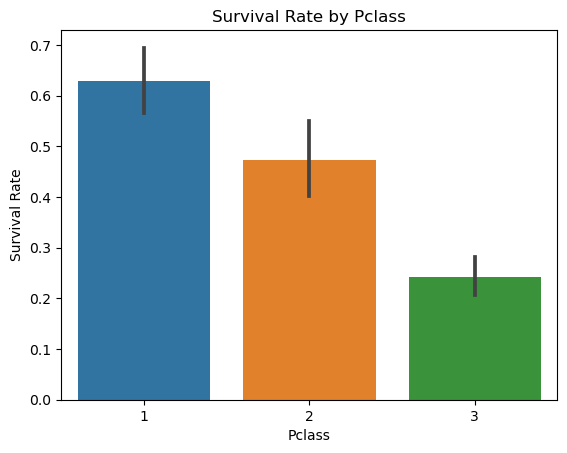

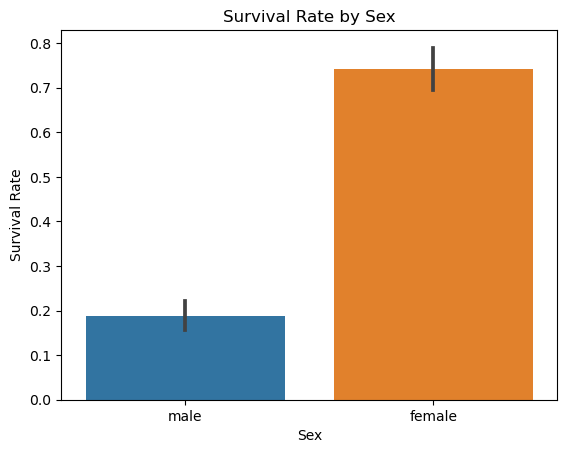

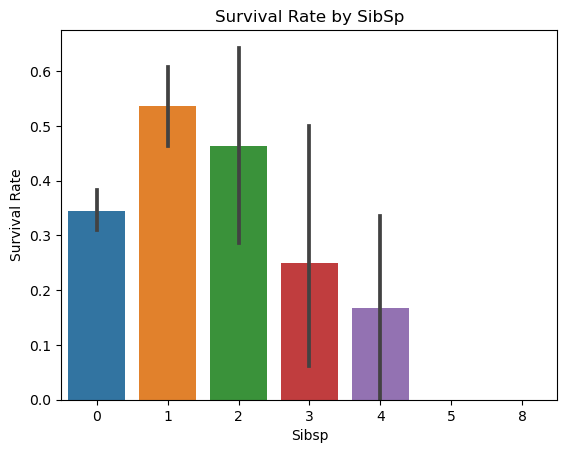

In [11]:
plot_survival_rate_by_column(columns_of_interest,train_data)

In [12]:
# I cannot make this function work with the test dataset because it does not have the 'Survived' column
# I have this section strictly as a placeholder for future use

# plot_survival_rate_by_column(columns_of_interest,test_data)

/Users/fahim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


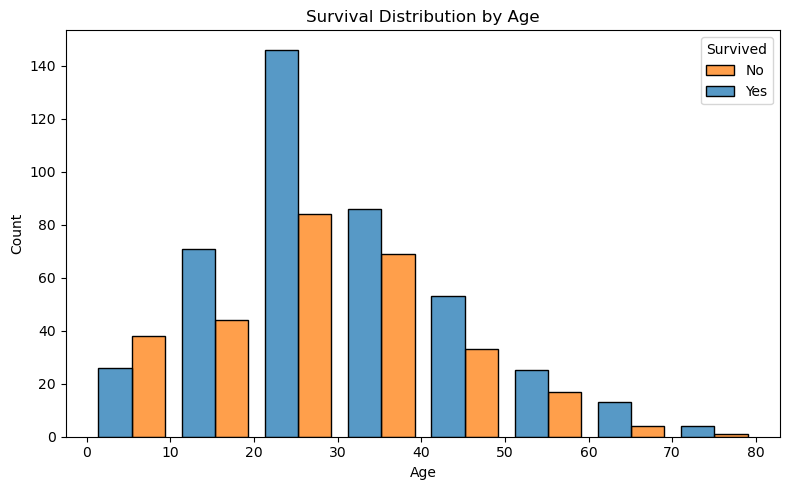

/Users/fahim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


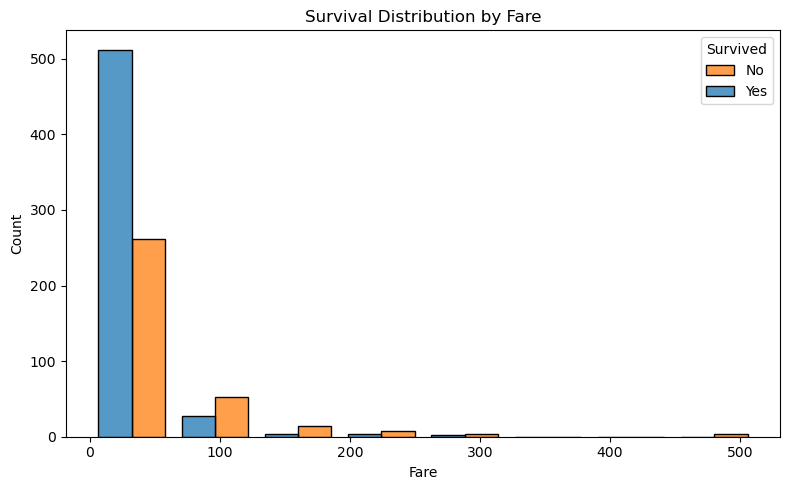

/Users/fahim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


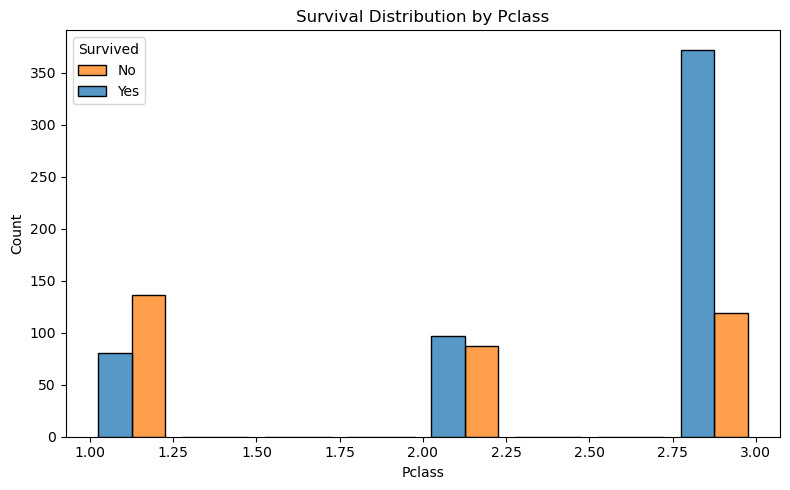

/Users/fahim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


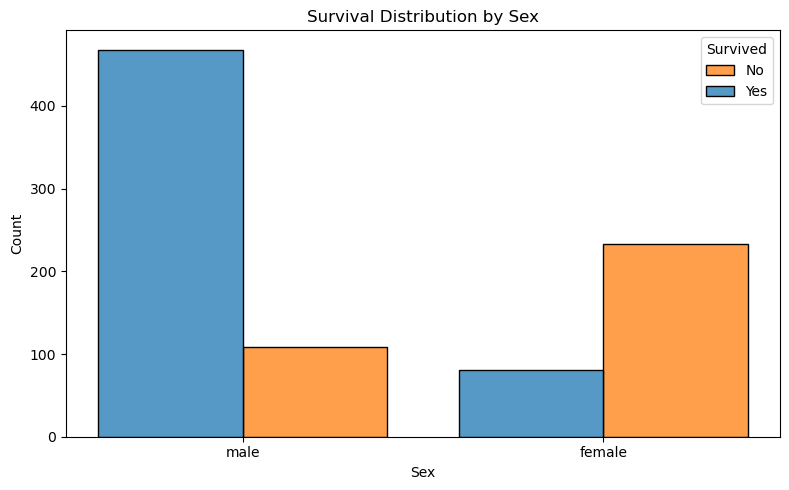

/Users/fahim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


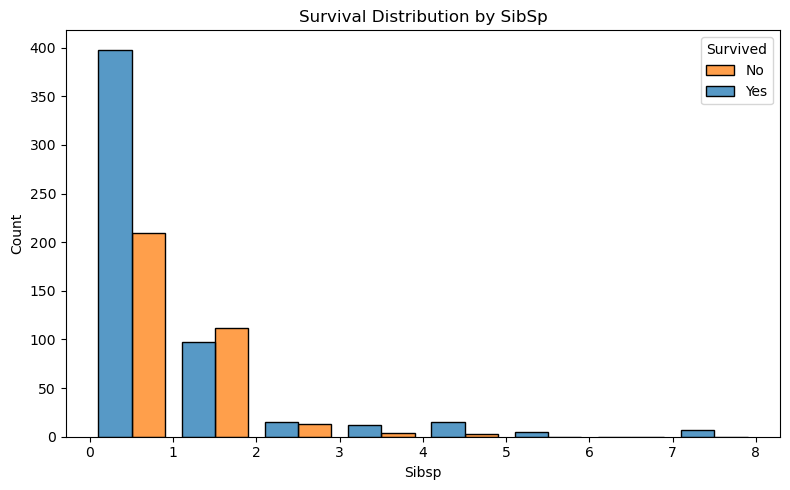

/Users/fahim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


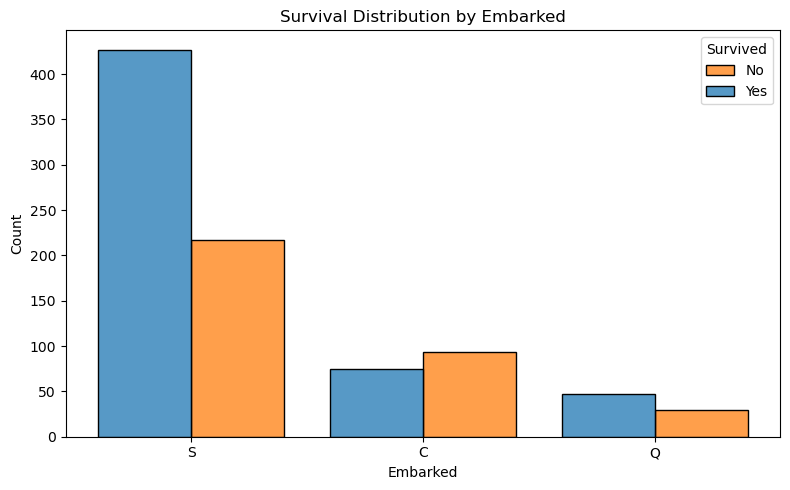

In [13]:
def histo_survival_rate_by_column(columns, data_set, bins=10):
    for column in columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(
            data=data_set,
            x=column,
            hue='Survived',   # Separate colors for survival status
            multiple='dodge', # Side-by-side bars
            bins=bins,
            kde=False,        # Turn off density lines
            shrink=0.8        # Slightly narrower bars
        )
        plt.title(f'Survival Distribution by {column}')
        plt.xlabel(column.capitalize())
        plt.ylabel('Count')
        plt.legend(title='Survived', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()

# Applciation
columns_of_interest = ['Age', 'Fare', 'Pclass','Sex','SibSp', 'Embarked']
histo_survival_rate_by_column(columns_of_interest, train_data, bins=8)


# Data Cleaning

In [14]:
# List the columns in the training dataset
print("Columns in the training dataset:", train_data.columns.tolist())

Columns in the training dataset: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [15]:
# Drop Columns from the training and test datasets that are not useful for analysis
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
cleaned_train = train_data.drop(columns=columns_to_drop)
cleaned_test = test_data.drop(columns=columns_to_drop)

# Random Forest Model

In [16]:
y_train= cleaned_train["Survived"]  # Target variable
X_train= cleaned_train.drop(columns=['Survived'])  # Features
X_train = pd.get_dummies(X_train, drop_first=True)  # Convert categorical variables to dummy variables

In [17]:
# X_test= cleaned_test.drop(columns=['Survived'])  # Features
X_test = pd.get_dummies(cleaned_test, drop_first=True)  # Convert categorical variables to dummy variables

In [18]:
features= X_train.columns.tolist()  # List of feature names
print("Features used for training:", features)

Features used for training: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [19]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [20]:
# Define hyperparameters
n_estimators = 100
max_depth = len(features)
min_samples_split = 2
min_samples_leaf = 1
bootstrap = True
random_state = 42


model = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                bootstrap=bootstrap,
                                random_state=random_state)

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Show the results of the model fit


output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


# Decision Tree

In [21]:

# Define hyperparameters for Decision Tree
max_depth = len(features)    
min_samples_split = 2
min_samples_leaf = 1
random_state = 42

# Initialize Decision Tree model
model = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Save results
output = pd.DataFrame({
    'PassengerId': test_data.PassengerId,
    'Survived': predictions
})
output.to_csv('submission_decision_tree.csv', index=False)
print("Decision Tree submission saved!")


Decision Tree submission saved!


# SVM

In [23]:
from sklearn.svm import SVC
import pandas as pd

# Drop rows with missing values in both train and test sets
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Keep y_train aligned with X_train
X_test = X_test.dropna()

# Define hyperparameters for SVM
kernel = 'rbf'         # Radial basis function kernel
C = 1.0                # Regularization parameter
gamma = 'scale'        # Kernel coefficient
random_state = 42

# Initialize SVM model
model = SVC(
    kernel=kernel,
    C=C,
    gamma=gamma,
    random_state=random_state
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Save results
output = pd.DataFrame({
    'PassengerId': test_data.loc[X_test.index, 'PassengerId'],
    'Survived': predictions
})
output.to_csv('submission_svm.csv', index=False)
print("SVM submission saved!")


SVM submission saved!
